******Problem Statement******

Objective: Develop a machine learning model to accurately classify individuals based on a specific health outcome. The model's goal is to assist healthcare providers in identifying patients at high risk for a particular condition, enabling timely intervention and personalized care plans.

**Step 1: Understand Your Data**

Before diving into model building, it's crucial to understand your dataset. W've already listed the attributes, which include a mix of numerical, categorical, and binary data types, with the target variable being binary (presence of heart disease)

In [2]:
#importing necessary libaries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


In [3]:
#import data

data=pd.read_csv('project1_data.csv')

df=data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,typical angina,125.0,212.0,less than 120mg/ml,ST-T wave abnormality,168.0,no,1.0,downsloping,2.0,NaN,0
1,53.0,1.0,typical angina,140.0,203.0,greater than 120mg/ml,normal,155.0,yes,3.1,upsloping,0.0,NaN,0
2,70.0,1.0,typical angina,145.0,174.0,less than 120mg/ml,ST-T wave abnormality,125.0,yes,2.6,NaN,0.0,NaN,0
3,61.0,1.0,typical angina,148.0,203.0,less than 120mg/ml,ST-T wave abnormality,161.0,no,0.0,downsloping,1.0,NaN,0
4,62.0,0.0,typical angina,138.0,294.0,greater than 120mg/ml,ST-T wave abnormality,NaN,NaN,1.9,flat,3.0,NaN,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#short description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       995 non-null    float64
 1   sex       995 non-null    float64
 2   cp        995 non-null    object 
 3   trestbps  995 non-null    float64
 4   chol      995 non-null    float64
 5   fbs       995 non-null    object 
 6   restecg   995 non-null    object 
 7   thalach   995 non-null    float64
 8   exang     995 non-null    object 
 9   oldpeak   995 non-null    float64
 10  slope     995 non-null    object 
 11  ca        995 non-null    float64
 12  thal      599 non-null    object 
 13  target    1025 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 112.2+ KB


In [7]:
#a simple statistical description for the Categorical column
df.describe(include='O')

,cp,fbs,restecg,exang,slope,thal
count,995,995,995,995,995,599
unique,4,2,3,2,3,3
top,typical angina,less than 120mg/ml,ST-T wave abnormality,no,flat,reversible defect
freq,478,846,496,662,468,529


In [8]:
# checking if there is missing value
df.isnull().sum()

age          30
sex          30
cp           30
trestbps     30
chol         30
fbs          30
restecg      30
thalach      30
exang        30
oldpeak      30
slope        30
ca           30
thal        426
target        0
dtype: int64

In [9]:
# checking if there is missing value
df.isnull().sum()

age          30
sex          30
cp           30
trestbps     30
chol         30
fbs          30
restecg      30
thalach      30
exang        30
oldpeak      30
slope        30
ca           30
thal        426
target        0
dtype: int64

In [10]:
df.age.value_counts()

age
58.0    67
57.0    55
54.0    50
59.0    45
52.0    40
51.0    39
60.0    37
62.0    36
56.0    36
64.0    33
44.0    33
63.0    31
67.0    31
61.0    30
41.0    29
55.0    29
65.0    27
42.0    26
53.0    26
43.0    26
66.0    25
45.0    24
46.0    22
48.0    21
50.0    21
47.0    17
49.0    17
35.0    15
70.0    14
39.0    14
38.0    12
68.0    12
71.0    11
40.0    11
69.0     9
37.0     6
34.0     6
29.0     3
77.0     3
76.0     3
74.0     3
Name: count, dtype: int64

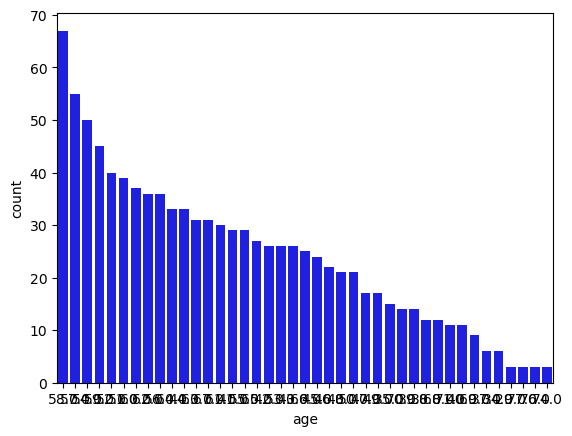

In [11]:
#count of all the number of age in descending order
sns.countplot(x=df.age, color='blue', order = df.age.value_counts().keys() );

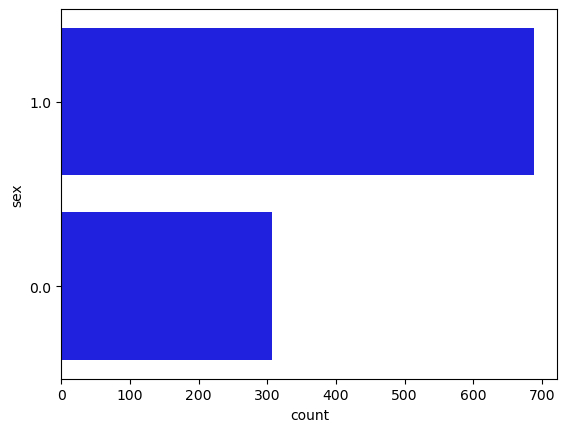

In [12]:
#count of all the location where the data was gotten from
sns.countplot(y=df.sex, color='blue', order = df.sex.value_counts().keys());

C:\Users\Computer\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


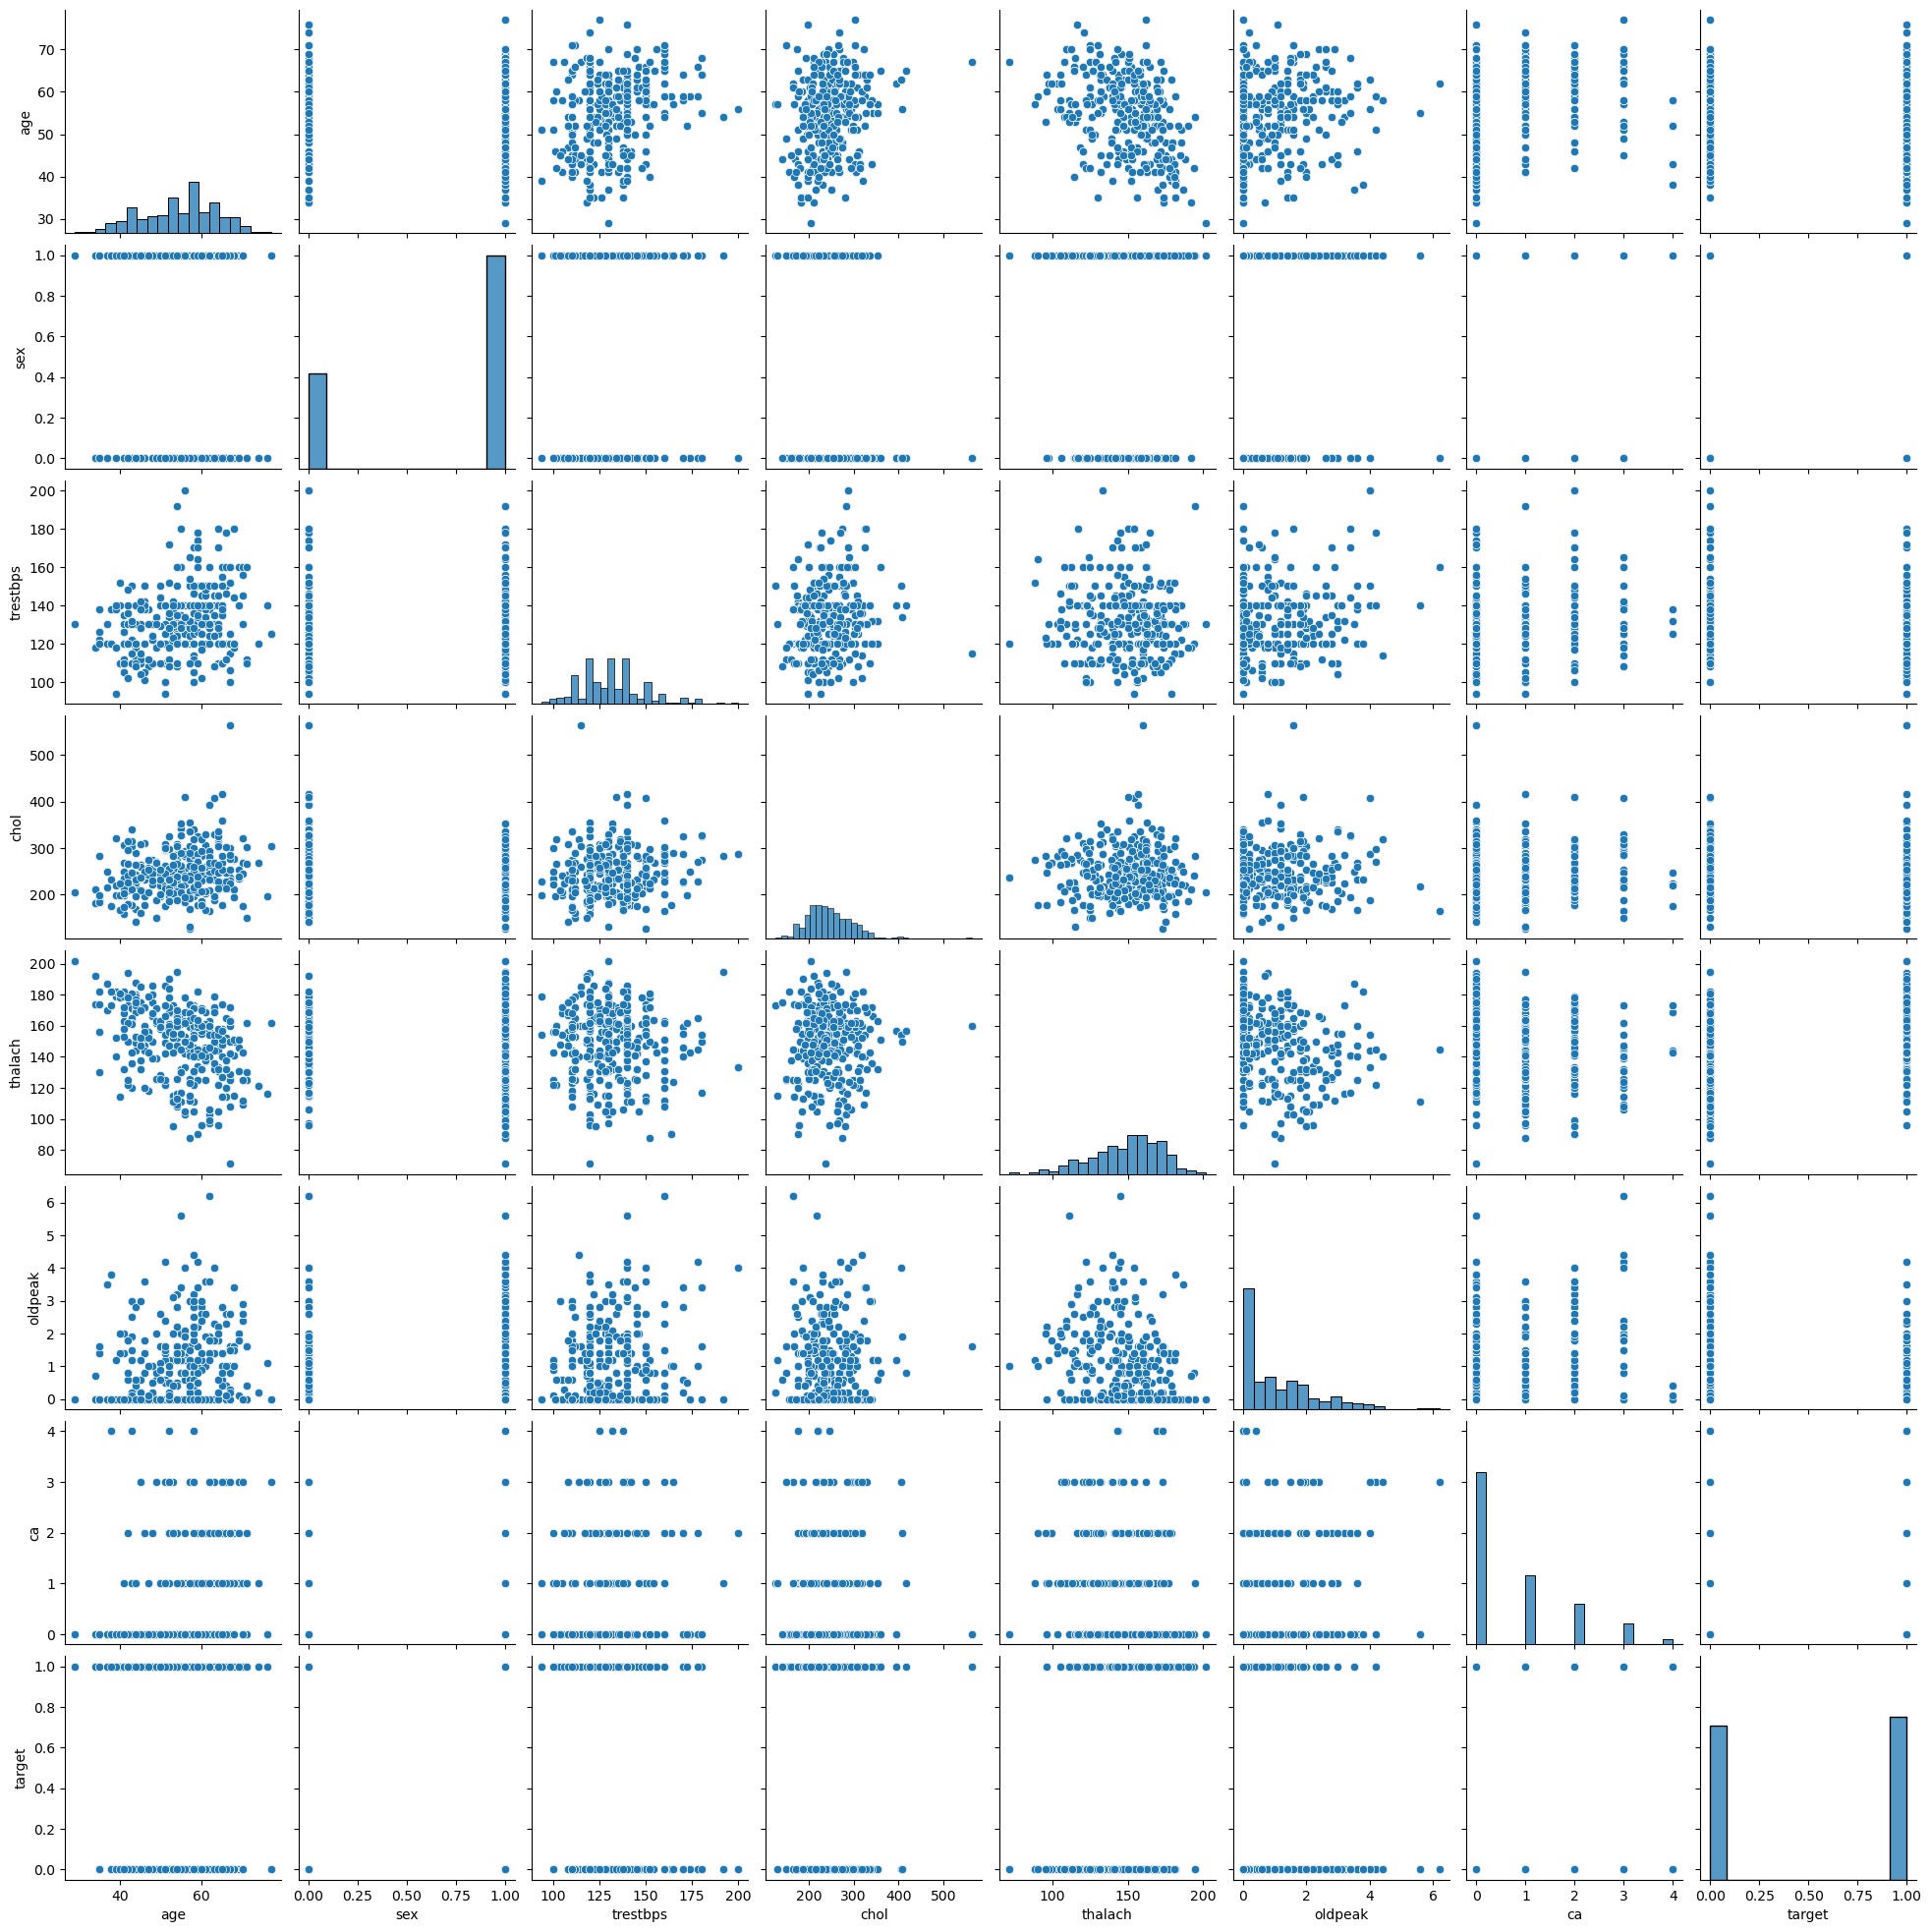

In [13]:
# a quick plot comparing columns
sns.pairplot(df, kind='scatter')
plt.show()

**Step 3: Preprocess the Data**

Handle missing values, encode categorical variables, and split the data.

In [16]:
# Example: Fill missing values for 'Age' with the median value
# df ['Age'].fillna(df['Age'].median(), inplace=True)


In [17]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'thal'], drop_first=True)

In [18]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'target', 'sex_1.0', 'cp_atypical angina',
       'cp_non-anginal pain', 'cp_typical angina',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'thal_normal',
       'thal_reversible defect'],
      dtype='object')

In [19]:
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [20]:
# Splitting the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
df['fbs'].unique()

array(['less than 120mg/ml', 'greater than 120mg/ml', nan], dtype=object)

In [22]:
df['fbs'].unique()

array(['less than 120mg/ml', 'greater than 120mg/ml', nan], dtype=object)

In [23]:
df.dtypes

age                                     float64
trestbps                                float64
chol                                    float64
fbs                                      object
thalach                                 float64
exang                                    object
oldpeak                                 float64
slope                                    object
ca                                      float64
target                                    int64
sex_1.0                                    bool
cp_atypical angina                         bool
cp_non-anginal pain                        bool
cp_typical angina                          bool
restecg_left ventricular hypertrophy       bool
restecg_normal                             bool
thal_normal                                bool
thal_reversible defect                     bool
dtype: object

In [24]:
unique_fbs_values = df['fbs'].unique()
print(unique_fbs_values)


['less than 120mg/ml' 'greater than 120mg/ml' nan]


In [25]:
conversion_dict = {
    'less than 120mg/ml': 0,
    'more than 120mg/ml': 1,
    'greater than 120mg/ml': 1  # Adding this line based on the error message
}

df['fbs'] = df['fbs'].replace(conversion_dict).astype(float)


In [26]:
df['fbs'].unique()


array([ 0.,  1., nan])

In [27]:
(df.dtypes)

age                                     float64
trestbps                                float64
chol                                    float64
fbs                                     float64
thalach                                 float64
exang                                    object
oldpeak                                 float64
slope                                    object
ca                                      float64
target                                    int64
sex_1.0                                    bool
cp_atypical angina                         bool
cp_non-anginal pain                        bool
cp_typical angina                          bool
restecg_left ventricular hypertrophy       bool
restecg_normal                             bool
thal_normal                                bool
thal_reversible defect                     bool
dtype: object

In [28]:
# Correcting the command with the correct DataFrame name and ensuring the conversion dictionary covers all variations seen in the data.
conversion_dict = {
    'less than 120mg/ml': 0, 
    'more than 120mg/ml': 1,
    'greater than 120mg/ml': 1  # Assuming this covers all variations
}

# Apply the conversion
df['fbs'] = df['fbs'].replace(conversion_dict).astype(float)

# Verify the conversion
print(df['fbs'].unique())


[ 0.  1. nan]


In [29]:
# Assuming 'exang' is the problematic column, replace 'yes' and 'no' with 1 and 0, respectively.
df['exang'] = df['exang'].replace({'yes': 1, 'no': 0}).astype(float)


In [30]:
df.dtypes

age                                     float64
trestbps                                float64
chol                                    float64
fbs                                     float64
thalach                                 float64
exang                                   float64
oldpeak                                 float64
slope                                    object
ca                                      float64
target                                    int64
sex_1.0                                    bool
cp_atypical angina                         bool
cp_non-anginal pain                        bool
cp_typical angina                          bool
restecg_left ventricular hypertrophy       bool
restecg_normal                             bool
thal_normal                                bool
thal_reversible defect                     bool
dtype: object

In [31]:
df.isnull().sum()

age                                     30
trestbps                                30
chol                                    30
fbs                                     30
thalach                                 30
exang                                   30
oldpeak                                 30
slope                                   30
ca                                      30
target                                   0
sex_1.0                                  0
cp_atypical angina                       0
cp_non-anginal pain                      0
cp_typical angina                        0
restecg_left ventricular hypertrophy     0
restecg_normal                           0
thal_normal                              0
thal_reversible defect                   0
dtype: int64

In [32]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
df = pd.get_dummies(df, columns=['slope', 'thalach'], drop_first=True)

In [34]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'ca', 'target',
       'sex_1.0', 'cp_atypical angina',
       ...
       'thalach_184.0', 'thalach_185.0', 'thalach_186.0', 'thalach_187.0',
       'thalach_188.0', 'thalach_190.0', 'thalach_192.0', 'thalach_194.0',
       'thalach_195.0', 'thalach_202.0'],
      dtype='object', length=108)

In [35]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.impute import SimpleImputer

# Create an imputer instance that replaces missing values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the training data and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# It's important to apply the same transformation to your test data
X_test_imputed = imputer.transform(X_test)


In [37]:
# Create the imputer object with a mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the training data
imputer.fit(X_train)


SimpleImputer()

In [38]:
# Create the imputer object with a mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [39]:
# Fit the imputer to the training data
imputer.fit(X_train)

SimpleImputer()

****Step 4: Train the Model****

Starting with Logistic Regression as an example.

python


In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model using the imputed training data
model.fit(X_train_imputed, y_train)


LogisticRegression(max_iter=1000)

In [41]:
prediction = model.predict(X_test_imputed)

In [42]:
prediction

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [43]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [44]:
#we need to evaluate our model
from sklearn.metrics import mean_absolute_error

In [45]:
#we use mae as the evaluation metrics
mean_absolute_error(y_test, prediction)

0.18048780487804877

In [46]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [47]:
mean_absolute_error(y_test, prediction)

0.18048780487804877

****Step 5: Try Other Models****

Experiment with different models to find the best performer.

In [48]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
from catboost import CatBoostClassifier

In [50]:
# Initialize the model
model = CatBoostClassifier(iterations=100, learning_rate=0.1)

# Train the model using the imputed training data
model.fit(X_train_imputed, y_train)

0:	learn: 0.5969770	total: 187ms	remaining: 18.5s
1:	learn: 0.5253007	total: 191ms	remaining: 9.34s
2:	learn: 0.4664347	total: 194ms	remaining: 6.26s
3:	learn: 0.4232671	total: 197ms	remaining: 4.72s
4:	learn: 0.3926925	total: 200ms	remaining: 3.8s
5:	learn: 0.3633802	total: 203ms	remaining: 3.18s
6:	learn: 0.3487229	total: 206ms	remaining: 2.74s
7:	learn: 0.3267992	total: 210ms	remaining: 2.41s
8:	learn: 0.3128446	total: 213ms	remaining: 2.15s
9:	learn: 0.3022892	total: 216ms	remaining: 1.95s
10:	learn: 0.2877020	total: 219ms	remaining: 1.77s
11:	learn: 0.2727490	total: 222ms	remaining: 1.63s
12:	learn: 0.2650682	total: 226ms	remaining: 1.51s
13:	learn: 0.2537905	total: 229ms	remaining: 1.41s
14:	learn: 0.2456175	total: 232ms	remaining: 1.31s
15:	learn: 0.2387280	total: 235ms	remaining: 1.23s
16:	learn: 0.2313522	total: 238ms	remaining: 1.16s
17:	learn: 0.2229880	total: 241ms	remaining: 1.1s
18:	learn: 0.2189810	total: 245ms	remaining: 1.04s
19:	learn: 0.2139447	total: 248ms	remaining

In [51]:
prediction = model.predict(X_test_imputed)

In [52]:
prediction

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [53]:
mean_absolute_error(y_test, prediction)

0.024390243902439025

In [54]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [55]:
accuracy = accuracy_score(y_test, prediction)

In [56]:
f"Model Accuracy: {accuracy}"

'Model Accuracy: 0.975609756097561'